# sequana_coverage test case example (Bacteria Staphylococcus aureus)

This notebook creates the BED file provided in 
- https://github.com/sequana/resources/tree/master/coverage and
- https://www.synapse.org/#!Synapse:syn10638358/wiki/465309

**WARNING**: you need an account on synapse to get the FastQ files.

First, downloads 2 FastQ from Synapse, its reference genome and its genbank annotation. Then, it performs the mapping using BWA to get a BAM file. The BAM file is converted to a BED, which is going to be one input file to our analysis. Finally, we use the coverage tool from Sequana project (i) with the standalone (sequana_coverage) and (ii) the Python library to analyse the BED file.

Versions used:
- sequana 0.5.0
- bwa mem 0.7.15
- bedtools 2.26.0
- samtools 1.5
- synapseclient 1.7.2

In [18]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [10,7]

Populating the interactive namespace from numpy and matplotlib


# Download the genbank and genome reference

In [6]:
from bioservices import ENA
ena = ENA()
data = ena.get_data("FN433596", frmt="fasta")
with open("FN433596.fasta", "wb") as fh:
    fh.write(data)

# Download the fastq files

### Method1: ftp from EBI website

In [1]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR036/ERR036019/ERR036019_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR036/ERR036019/ERR036019_2.fastq.gz

--2017-09-05 20:13:12--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR036/ERR036019/ERR036019_1.fastq.gz
           => ‘ERR036019_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.192.7
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.192.7|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/ERR036/ERR036019 ... done.
==> SIZE ERR036019_1.fastq.gz ... 450249800
==> PASV ... done.    ==> RETR ERR036019_1.fastq.gz ... done.
Length: 450249800 (429M) (unauthoritative)

ERR036019_1.fastq.g 100%[===================>] 429.39M  5.35MB/s    in 77s     

2017-09-05 20:14:31 (5.60 MB/s) - ‘ERR036019_1.fastq.gz’ saved [450249800]

--2017-09-05 20:14:31--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR036/ERR036019/ERR036019_2.fastq.gz
           => ‘ERR036019_2.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.192.7
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.1

### Method2: synapse 

In [5]:
import synapseclient
l = synapseclient.login()
_ = l.get("syn10638533", downloadLocation=".", ifcollision="overwrite.local")
_ = l.get("syn10638546", downloadLocation=".", ifcollision="overwrite.local")

Welcome, Thomas Cokelaer!



# Map the reads
**depending on your system this step may take a while**

In [8]:
!sequana_mapping --file1 ERR036019_1.fastq.gz --file2 ERR036019_2.fastq.gz --reference FN433596.fasta --thread 4

Theoretical Depth of Coverage : 453.4815540169755
[bwa_index] Pack FASTA... 0.02 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.73 seconds elapse.
[bwa_index] Update BWT... 0.01 sec
[bwa_index] Pack forward-only FASTA... 0.01 sec
[bwa_index] Construct SA from BWT and Occ... 0.27 sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa index FN433596.fasta
[main] Real time: 1.167 sec; CPU: 1.041 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 533334 sequences (40000050 bp)...
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (12, 263542, 7, 3)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (199, 742, 7139)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 21019)
[M::mem_pestat] mean and std.dev: (2815.92, 3264.22)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 27959)
[M::mem_pesta

[M::mem_process_seqs] Processed 533334 reads in 15.343 CPU sec, 3.863 real sec
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (19, 262156, 5, 7)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (119, 243, 6146)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 18200)
[M::mem_pestat] mean and std.dev: (2169.21, 2979.61)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 24227)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (219, 269, 336)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 570)
[M::mem_pestat] mean and std.dev: (282.74, 85.91)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 687)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enou

[M::mem_process_seqs] Processed 533334 reads in 15.247 CPU sec, 3.847 real sec
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (17, 255691, 2, 7)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (122, 214, 3940)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 11576)
[M::mem_pestat] mean and std.dev: (2069.82, 3214.15)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 15394)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (220, 269, 336)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 568)
[M::mem_pestat] mean and std.dev: (282.92, 85.61)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 684)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enou

[M::mem_process_seqs] Processed 533334 reads in 15.962 CPU sec, 4.020 real sec
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (9, 252065, 5, 5)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (219, 269, 336)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 570)
[M::mem_pestat] mean and std.dev: (282.92, 85.79)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 687)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 533334 reads in 14.206 CPU sec, 3.582 real sec
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (20, 257596, 8, 13)
[M::mem_pestat] analyzing insert size distributi

[M::mem_pestat] (25, 50, 75) percentile: (218, 267, 333)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 563)
[M::mem_pestat] mean and std.dev: (280.45, 84.59)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 678)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_pestat] skip orientation FF
[M::mem_process_seqs] Processed 533334 reads in 18.738 CPU sec, 4.708 real sec
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (12, 220685, 3, 6)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (172, 273, 1618)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 4510)
[M::mem_pestat] mean and std.dev: (335.90, 434.60)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 5956)
[M::mem_pestat] analyzing insert

## Convert BAM to BED

In [9]:
!bedtools genomecov -d -ibam FN433596.fasta.sorted.bam > FN433596.bed

## Filter the BAM file to get a 2-columns BED file

In [10]:
!samtools view -q 35 -o FN433596.filtered.bam FN433596.fasta.sorted.bam
!samtools depth -d 20000 FN433596.fasta.sorted.bam FN433596.filtered.bam -aa > FN433596.filtered.bed

# get a genbank (for the standalone sequana_coverage)

In [12]:
from sequana.snpeff import download_fasta_and_genbank
download_fasta_and_genbank("FN433596", "FN433596", fasta=False)

# Sequana coverage

In [15]:
from sequana import GenomeCov
# load the BED and genbank file
b = GenomeCov("FN433596.bed", "FN433596.gbk")
b.compute_gc_content("FN433596.fa")

In [16]:
# load the first chromosome and compute running median and get z-scores
chromosome = b.chr_list[0]
chromosome.running_median(20001, circular=True)
chromosome.compute_zscore()

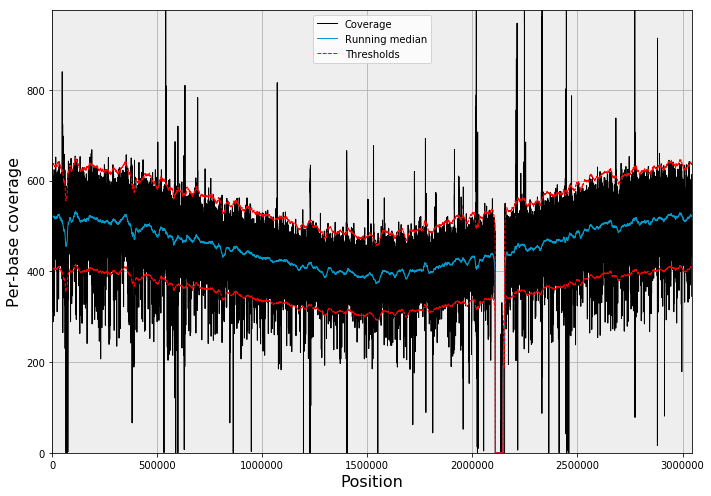

In [19]:
# 5Mb data points. So, this may take a while.
chromosome.plot_coverage()

# You can also use the sequana_coverage standalone application

In [20]:
!sequana_coverage --input FN433596.bed --reference FN433596.fasta --genbank FN433596.gbk

INFO:root:Reading FN433596.bed. This may take time depending on your input file
INFO:root:Computing GC content

Genome length: 3043210
Sequencing depth (DOC):   447.81 
Sequencing depth (median):   453.00 
Breadth of coverage (BOC) (percent): 98.46 
Genome coverage standard deviation :    84.12 
Genome coverage coefficient variation :     0.19 
INFO:root:Computing running median (w=4001)
Number of mixture model 2 
Computing zscore
INFO:root:Computing centralness
                        in the genbank. Make sure the chromosome names in
                        the BAM/BED files are compatible with the genbank
                        content. Genbank files contains the following keys 
                        - FN433596
 Guessed the chromosome name to be: FN433596
                        in the genbank. Make sure the chromosome names in
                        the BAM/BED files are compatible with the genbank
                        content. Genbank files contains the following keys 
     

# Open the ./report/sequana_coverage.html file 